In [1]:
# import required libraries for this section
import numpy as np
import matplotlib.pyplot as plt
import cv2

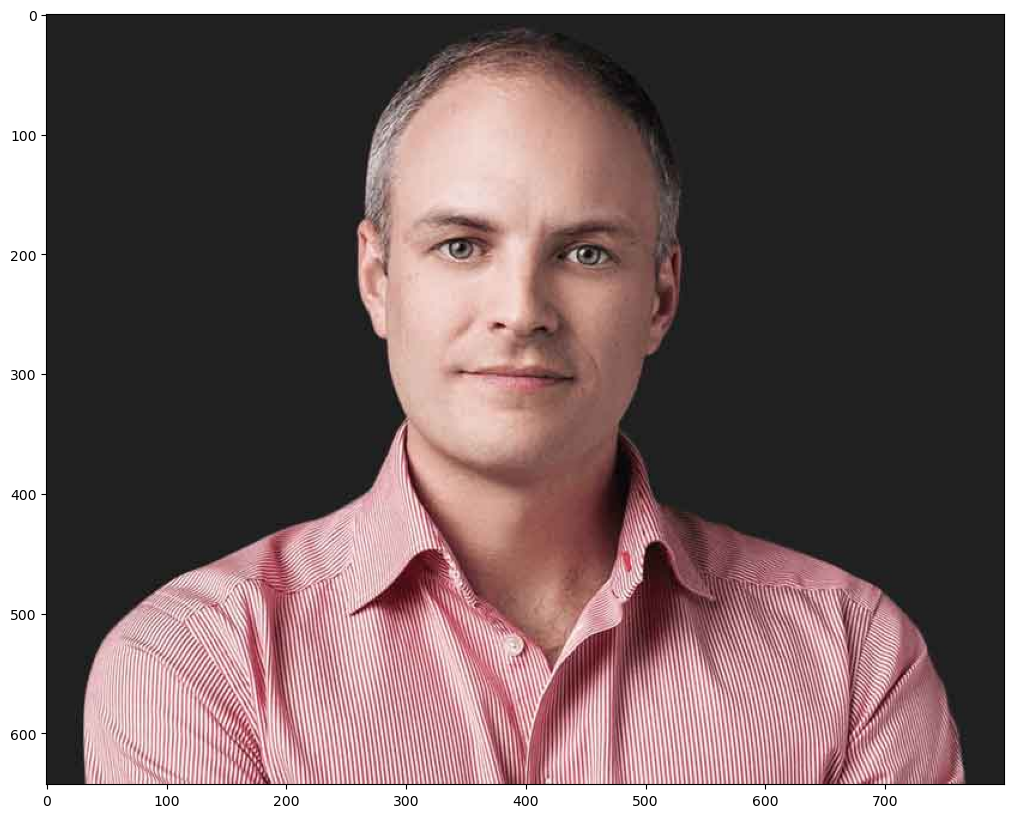

In [2]:
# load in color image for face detection
image = cv2.imread('mop.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

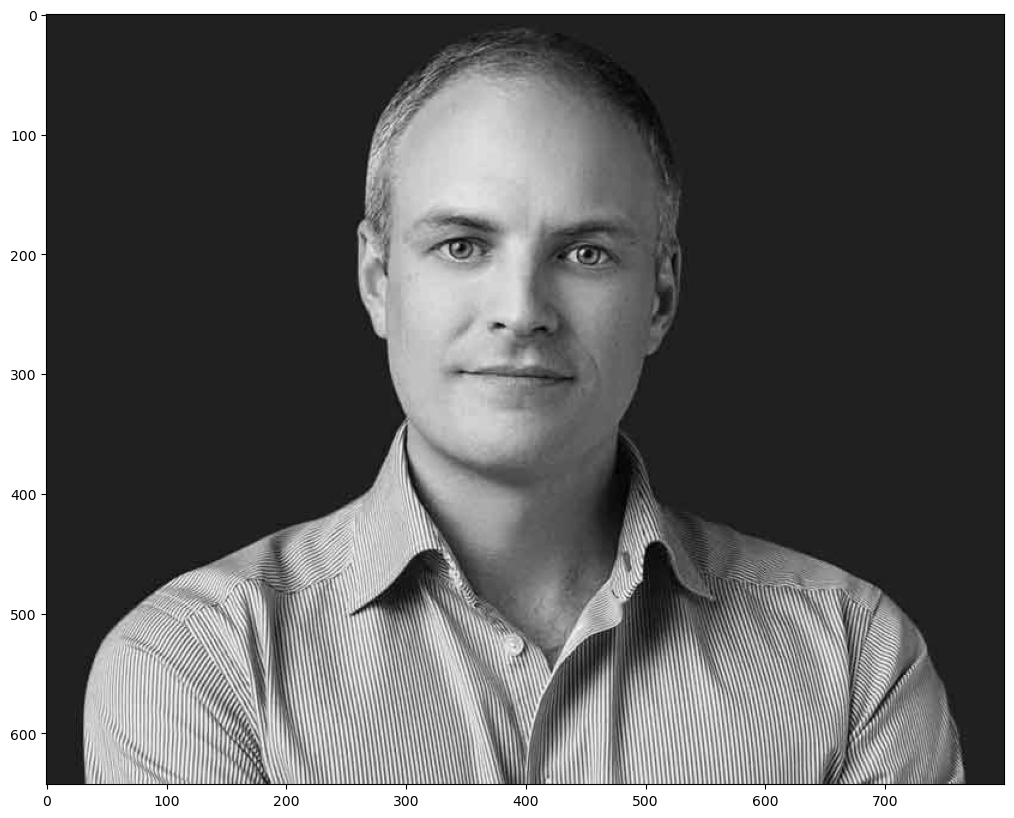

In [3]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

In [5]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('eyes.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 3)

print(len(faces))
eyes

1


array([[417, 173,  57,  57],
       [317, 166,  58,  58],
       [400, 252,  28,  28],
       [382, 268,  20,  20]])

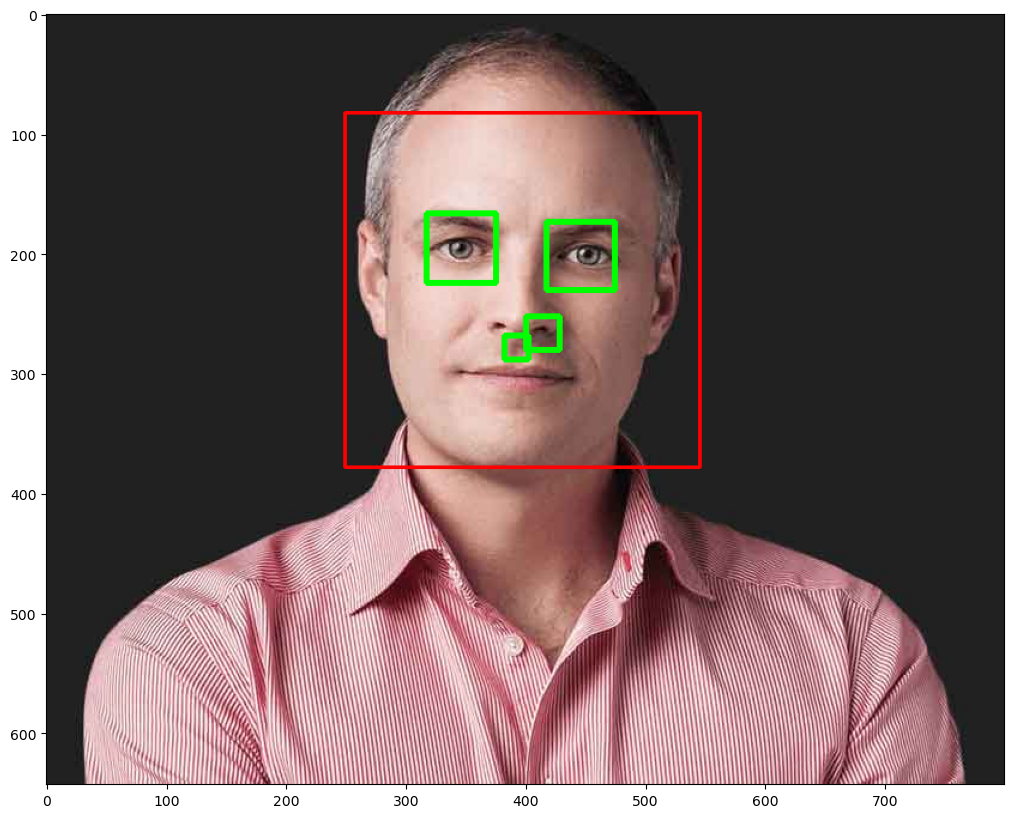

In [6]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.
    # Note: the fourth element (255,0,0) determines the color of the rectangle,
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    images = cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    # roi_gray = gray[y:y+h, x:x+w]
    # roi_color = frame[y:y+h, x:x+w]
    for (x,y,w,h) in eyes:
        images = cv2.rectangle(images,(x,y),(x+w,y+h),(0,255,0),3)


# print(x,y)
# print(w,h)
# print(x+w,y+h)
# display the result
plt.figure(figsize=(20,10))
plt.imshow(images)

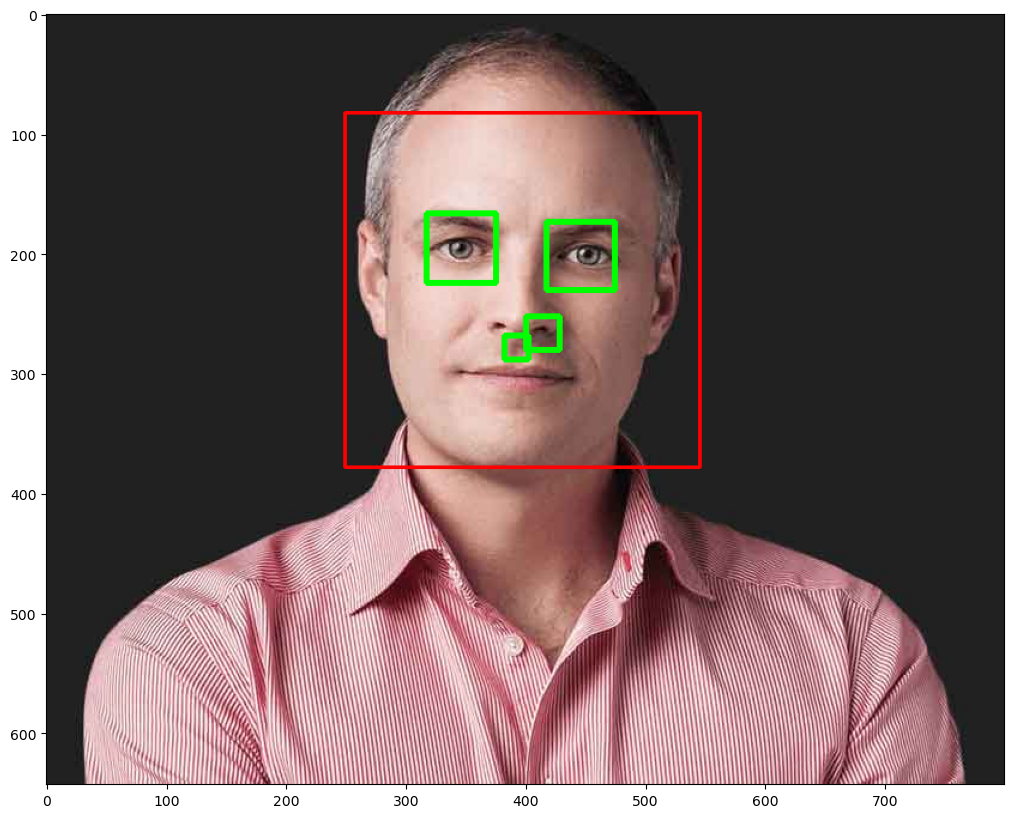

In [7]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of
all_images = []
# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.
    # Note: the fourth element (255,0,0) determines the color of the rectangle,
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    images = cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    # roi_gray = gray[y:y+h, x:x+w]
    roi_color = images[y:y+h, x:x+w]
    all_images.append(roi_color)
    for (x,y,w,h) in eyes:
        images = cv2.rectangle(images,(x,y),(x+w,y+h),(0,255,0),3)


# print(x,y)
# print(w,h)
# print(x+w,y+h)
# display the result
plt.figure(figsize=(20,10))
plt.imshow(images)

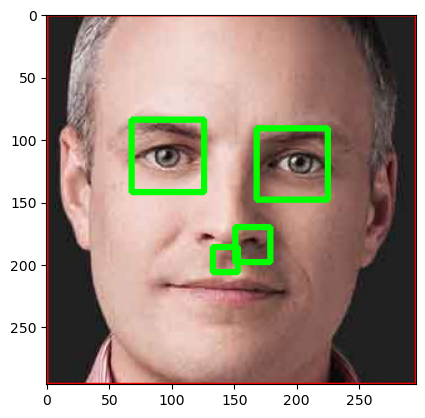

In [8]:
for i in all_images:
  plt.imshow(i)
  plt.show()

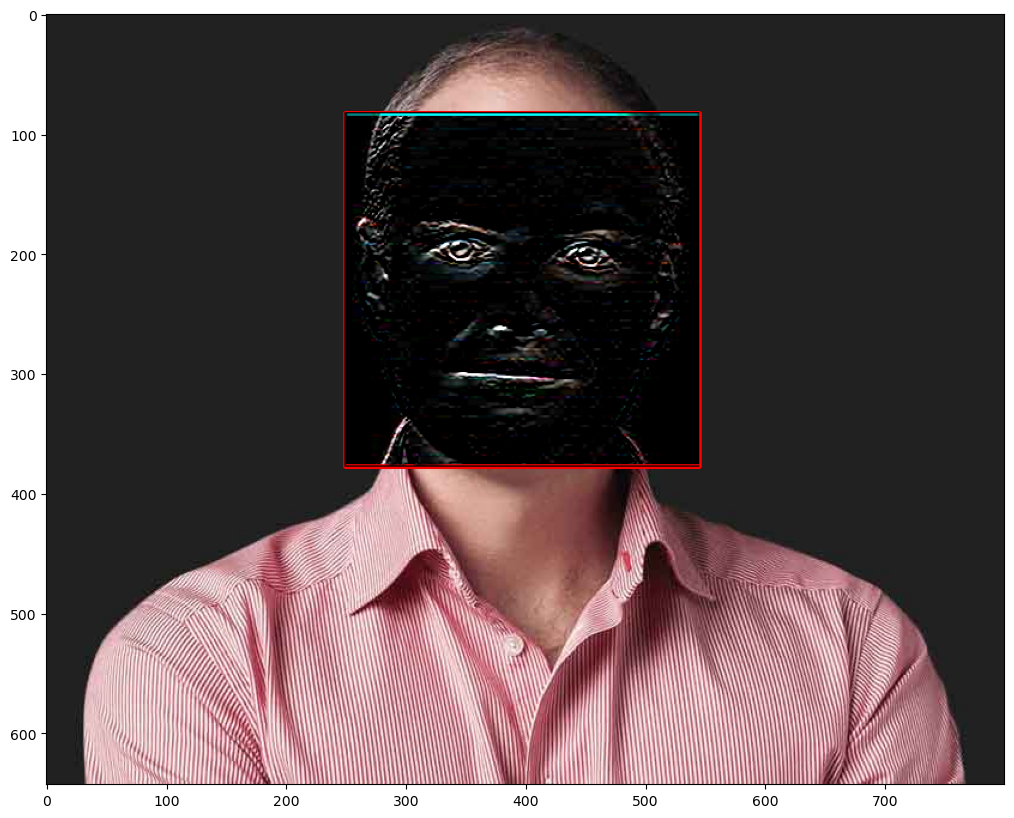

In [9]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.
    # Note: the fourth element (255,0,0) determines the color of the rectangle,
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    images = cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    # roi_gray = gray[y:y+h, x:x+w]
    roi_color = images[y:y+h, x:x+w]
    sobel_y = np.array([[-1,-2,-1],
                        [ 0, 0, 0],
                        [ 1, 2, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
    images[y:y+h, x:x+w] = cv2.filter2D(roi_color, -1, sobel_y)
    # for (x,y,w,h) in eyes:
    #     images = cv2.rectangle(images,(x,y),(x+w,y+h),(0,255,0),3)


# print(x,y)
# print(w,h)
# print(x+w,y+h)
# display the result
plt.figure(figsize=(20,10))
plt.imshow(images)